<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src = "https://github.com/Jangrae/img/blob/master/admission.png?raw=true" width=800/></center>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Admission 데이터를 대상으로 모델링을 진행합니다.
- Decision Tree 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상/하위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 하위 몇 개 행 확인
data.tail()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0
499,327,113,4,4.5,4.5,9.04,0,1


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [6]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [7]:
# 상관관계 확인
data.corr(numeric_only=True)

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [8]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다.
    - 알고리즘: DecisionTreeClassifier

In [10]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier

In [11]:
# 2단계: 선언하기
model = DecisionTreeClassifier()

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5.분류 성능 평가

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [22]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(confusion_matrix(y_test, y_pred))

[[76  8]
 [ 9 57]]


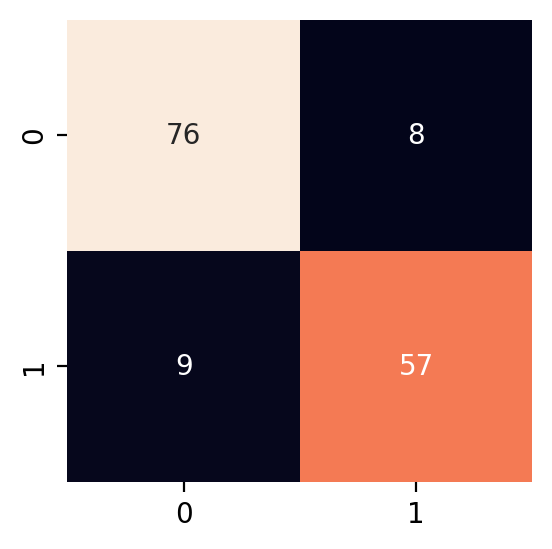

In [25]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot=True,
           cbar=False)
plt.show()

**2) Accuracy**

$$\large Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [26]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
accuracy_score(y_test, y_pred)

0.8866666666666667

**3) Precision**

$$\large Precision = \frac{TP}{TP+FP}$$

In [35]:
# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
precision_score(y_test, y_pred, average=None)

array([0.89411765, 0.87692308])

**4) Recall**

$$\large Recall = \frac{TP}{TP+FN}$$

In [34]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
recall_score(y_test, y_pred, average=None)

array([0.9047619 , 0.86363636])

**5) F1-Score**

$$\large F1 = \frac{2\times Precision\times Recall}{Precision+Recall}$$

In [33]:
# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
f1_score(y_test, y_pred, average=None)

array([0.89940828, 0.87022901])

**6) Classification Report**

In [32]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        84
           1       0.88      0.86      0.87        66

    accuracy                           0.89       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.89      0.89      0.89       150

